## Pandas Lab: Solutions

_Objective_: clean and manipulate the education outcomes toy dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Set path to toy education outcomes dataset

path = r'https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/June_2021_ETEC/day_2/data/data_edu.csv'

In [3]:
# Read data from csv file into dataframe

df = pd.read_csv(path, encoding = 'utf_8')

#### Inspect and prepare the dataset

In [4]:
df.head()

,country_id,country,country_school_id,country_student_id,student_gender,computer_at_home,internet_at_home,immigration_status,early_education,repeated_grades,school_location,school_type,school_size,class_size,socioeconomic_index,math_score,reading_score,parent_education
0,Argentina,Argentina,3200001,3213049,Female,No,Yes,First-Generation,Attended ECEC for at least two but less than t...,Repeated a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.3730,314.25031,424.07239,"Post secondary, non-tertiary"
1,Argentina,Argentina,3200001,3203374,Female,Yes,Yes,Native,Attended ECEC for at least two but less than t...,Did not repeat a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.1825,356.07629,380.26309,"Post secondary, non-tertiary"
2,Argentina,Argentina,3200001,3204844,Male,No,No,First-Generation,Attended ECEC for at least one but less than t...,Did not repeat a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-2.3486,338.08029,384.89191,Lower secondary
3,Argentina,Argentina,3200001,3211193,Female,Yes,Yes,Native,Attended ECEC for at least two but less than t...,Did not repeat a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-0.9259,310.38690,392.88031,"Post secondary, non-tertiary"
4,Argentina,Argentina,3200001,3213736,Female,No,Yes,Native,Attended ECEC for at least three but less than...,Did not repeat a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-0.9622,397.42441,452.03439,"Post secondary, tertiary"


In [5]:
# Note how this syntax works. You could add extra columns that interest you.
my_cols = [  'country',
             'country_school_id',
             'country_student_id',
             'student_gender',
             'repeated_grades',
             'school_type',
             'school_size',
             'class_size',
             'socioeconomic_index',
             'math_score',
             'reading_score',
             'parent_education'
          ]
df = df[my_cols]
df.head(2)

,country,country_school_id,country_student_id,student_gender,repeated_grades,school_type,school_size,class_size,socioeconomic_index,math_score,reading_score,parent_education
0,Argentina,3200001,3213049,Female,Repeated a grade,Public,570,31-35 students,-1.3730,314.25031,424.07239,"Post secondary, non-tertiary"
1,Argentina,3200001,3203374,Female,Did not repeat a grade,Public,570,31-35 students,-1.1825,356.07629,380.26309,"Post secondary, non-tertiary"


In [6]:
df.columns.tolist()

['country',
 'country_school_id',
 'country_student_id',
 'student_gender',
 'repeated_grades',
 'school_type',
 'school_size',
 'class_size',
 'socioeconomic_index',
 'math_score',
 'reading_score',
 'parent_education']

### Exercise 1. 
__Summarize data using mean, min/max(), describe() etc.__

* a: Find out the maximum and minimum math score globally 
* b: Find out the mean and median reading score for students in Japan
* c: BONUS: Can you identify the student who has the highest math score among female students? Which country is this student from? What is this student's reading_score? (HINT: look up how to use .idxmax())


In [7]:
# 1a:

In [8]:
max_math_score = df.math_score.max()
min_math_score = df.math_score.min()

print("Maximum Math Score Globally:", 
      max_math_score,
      "\nMinimum Math Score Globally:", 
      min_math_score)

Maximum Math Score Globally: 797.78302 
Minimum Math Score Globally: 128.11391


In [9]:
# 1b.

In [10]:
mean_reading_score_japan = df[df.country=="Japan"].reading_score.mean()
median_reading_score_japan = df[df.country=="Japan"].reading_score.median()

print("Mean Reading Score in Japan:", 
      mean_reading_score_japan,
      "\nMedian Reading Score in Japan:", 
      median_reading_score_japan)

Mean Reading Score in Japan: 503.47929140121136 
Median Reading Score in Japan: 508.07000999999997


In [11]:
# 1c BONUS: 

In [12]:
df_female = df[df.student_gender=="Female"]

df_female.loc[df_female.math_score.idxmax(),:]

country                             New Zealand
country_school_id                      55400085
country_student_id                     55403875
student_gender                           Female
repeated_grades         Did not repeat a  grade
school_type                 Private Independent
school_size                             Invalid
class_size                       21-25 students
socioeconomic_index                      1.7182
math_score                              736.818
reading_score                           730.991
parent_education       Post secondary, tertiary
Name: 31262, dtype: object

### Exercise 2: 

__Selecting values with boolean criteria + dealing with null values__

* a: Among students in Finland, what is the share of students who scored higher than or equal to 500 in maths?
* b: Is it true that median reading scores are higher after omitting students whose socioeconomic_index is listed as null? (HINT: Compare the median reading_score with and without omitting null values for socioeconomic status)

In [13]:
# 2a

In [14]:
fin_above_500 = df[(df.country=="Finland")&(df.math_score>=500)].shape[0]

print("Share of Finnish students who scored higher than or equal to 500 in math = ", fin_above_500 / df[df.country=="Finland"].shape[0])

Share of Finnish students who scored higher than or equal to 500 in math =  0.5593910426624181


In [15]:
# 2b. 

In [16]:
med = df.reading_score.median()
print("Median reading score:", med)

# Option 1: 
# med_after_omitting_null = df[df.socioeconomic_index.notna()].reading_score.median()

# Option 2: 
new_df = df.dropna(subset=["socioeconomic_index"])
med_after_omitting_null = new_df.reading_score.median()
print("Median reading score after omitting observations where socioeconomic index is null:", med_after_omitting_null)

Median reading score: 477.10250999999994
Median reading score after omitting observations where socioeconomic index is null: 478.122205


### Exercise 3.
Practice using pandas.Series.value_counts, pandas.Series.unique(), and pandas.Series.nunique()

* a: What percentage of students are male? Can you round the answer to three decimal places? # Look up pandas.Series.value_counts() and the round() function
* b: Find out the share of male students in public schools?
* c: How many unique schools are represented from Argentina? # pandas.Series.unique()
* d: BONUS: How many schools only have one student represented? How many have less than 10?


In [17]:
# 3a

In [18]:
# Using get the breakdown using value_counts

df.student_gender.value_counts()

Female    25308
Male      25089
Name: student_gender, dtype: int64

In [19]:
# To get percentages

df.student_gender.value_counts(normalize=True)

Female    0.502173
Male      0.497827
Name: student_gender, dtype: float64

In [20]:
print("Male students make up {} % of the observations.".format(df.student_gender.value_counts(normalize=True)[1].round(3)))

Male students make up 0.498 % of the observations.


In [21]:
# 3b: 

In [22]:
# What values does the school_type column take?

df.school_type.unique()

array(['Public', 'Private Government-dependent', 'Private Independent',
       'No Response', 'Invalid'], dtype=object)

In [23]:
# Use condition school_type=="Public" to select public schools only:

df[df.school_type=="Public"].student_gender.value_counts(normalize=True)

Male      0.503069
Female    0.496931
Name: student_gender, dtype: float64

In [24]:
# 3c.

In [25]:
# Use pandas.Series.nunique()

print("Number of unique schools from Argentina:", df[df.country=="Argentina"].country_school_id.nunique())

Number of unique schools from Argentina: 455


In [26]:
#3d BONUS:

In [27]:
df.country_school_id.value_counts().tail(17)

3200174     2
64200003    2
57800145    2
24600092    1
3200004     1
57800229    1
3200108     1
57800218    1
24600184    1
3200163     1
57800128    1
24600108    1
84000006    1
3200270     1
3200412     1
3200318     1
24600098    1
Name: country_school_id, dtype: int64

In [28]:
print("Number of schools with only one student represented:", df.country_school_id.value_counts()[df.country_school_id.value_counts()==1].shape[0])

Number of schools with only one student represented: 14


In [29]:
print("Number of schools with less than ten students represented:", df.country_school_id.value_counts()[df.country_school_id.value_counts()<10].shape[0])

Number of schools with less than ten students represented: 96


### Exercise 4:

Look up the [pandas.Series.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) function, and some [examples of how to use it](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Explore any questions that interest you by plotting charts, for example:
  
* a: Does the breakdown students by school type? (pie chart)
* b: What does the distribution of socioeconomic_index look like (histogram)
* c: Do math scores differ between students who repeated a grade vs those who did not repeat a grade? (boxplot of math_score by repeated_grades) 
* d: BONUS: Can you re-create this boxplot omitting the "No Response" values?

<AxesSubplot:ylabel='school_type'>

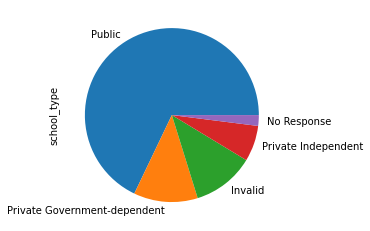

In [30]:
# 4a. Pie Chart

df.school_type.value_counts().plot(kind="pie")

In [31]:
# 4b. Histogram 

<AxesSubplot:>

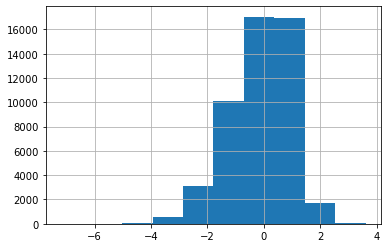

In [32]:
df.socioeconomic_index.hist()

In [33]:
# 4c: Boxplot

In [34]:
# Inspect the repeated_grades column

df.repeated_grades.value_counts()

Did not repeat a  grade    32399
No Response                13513
Repeated a  grade           4485
Name: repeated_grades, dtype: int64

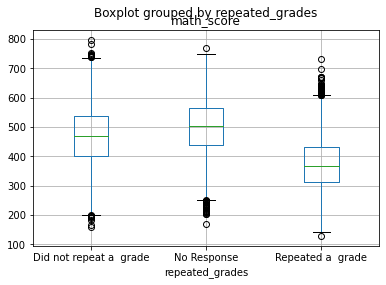

In [35]:
# NOTE: make sure you have matplotlib and/or seaborn imported!

import matplotlib.pyplot as plt
import seaborn as sns

df.boxplot(column = "math_score", by="repeated_grades")
plt.show()

In [36]:
# 4d BONUS: Boxplot

In [37]:
# To remove "No Response" from the figure:
# Tag "No Response" as a null value:

df['repeated_grades'] = df['repeated_grades'].apply(lambda x: None if x=="No Response" else x)

df.repeated_grades.isna().sum()

13513

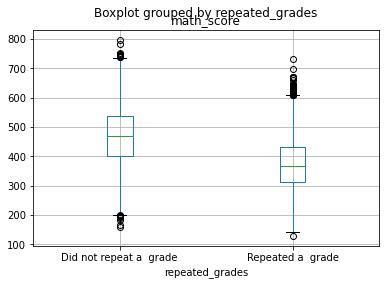

In [38]:
# NOTE: make sure you have matplotlib and/or seaborn imported!

import matplotlib.pyplot as plt
import seaborn as sns

df.boxplot(column = "math_score", by="repeated_grades")
plt.show()

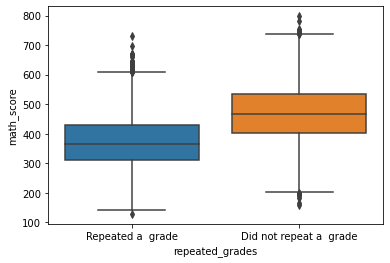

In [39]:
# Alternatively (using seaborn)

sns.boxplot(x="repeated_grades", 
            y="math_score",
            data=df)

plt.show()